In [94]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [95]:
data = pd.read_csv('GOOGL.csv', date_parser= True)

In [96]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3856,2019-12-13,1347.900024,1351.349976,1341.660034,1346.869995,1346.869995,1658684
3857,2019-12-16,1355.000000,1363.530029,1350.609985,1360.699951,1360.699951,1406457
3858,2019-12-17,1362.410034,1364.329956,1350.770020,1354.890015,1354.890015,1648549
3859,2019-12-18,1357.000000,1359.430054,1350.459961,1351.910034,1351.910034,1166733
3860,2019-12-19,1351.910034,1357.525879,1348.750732,1356.439941,1356.439941,1521082


In [97]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.789162,54.592846,50.298691,54.207474,54.207474,22778271
1,2004-08-23,55.433659,56.794975,54.577831,54.752998,54.752998,18234539
2,2004-08-24,55.673893,55.854065,51.835175,52.485806,52.485806,15241412
3,2004-08-25,52.530849,54.052322,51.990326,53.051353,53.051353,9130694
4,2004-08-26,52.525845,54.027298,52.380703,54.007278,54.007278,7077252
...,...,...,...,...,...,...,...
3856,2019-12-13,1347.900024,1351.349976,1341.660034,1346.869995,1346.869995,1658684
3857,2019-12-16,1355.000000,1363.530029,1350.609985,1360.699951,1360.699951,1406457
3858,2019-12-17,1362.410034,1364.329956,1350.770020,1354.890015,1354.890015,1648549
3859,2019-12-18,1357.000000,1359.430054,1350.459961,1351.910034,1351.910034,1166733


In [98]:
data_train= data[data['Date']<'2016-11-24'].copy()


In [99]:
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.789162,54.592846,50.298691,54.207474,54.207474,22778271
1,2004-08-23,55.433659,56.794975,54.577831,54.752998,54.752998,18234539
2,2004-08-24,55.673893,55.854065,51.835175,52.485806,52.485806,15241412
3,2004-08-25,52.530849,54.052322,51.990326,53.051353,53.051353,9130694
4,2004-08-26,52.525845,54.027298,52.380703,54.007278,54.007278,7077252
...,...,...,...,...,...,...,...
3084,2016-11-17,782.500000,788.900024,779.849976,786.159973,786.159973,1533679
3085,2016-11-18,787.169983,791.289978,775.349976,775.969971,775.969971,1806264
3086,2016-11-21,778.099976,786.549988,776.299988,784.799988,784.799988,1630835
3087,2016-11-22,788.989990,793.770020,783.739990,785.000000,785.000000,1394174


In [100]:
data_test= data[data['Date']>='2016-11-24'].copy()

In [101]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3089,2016-11-25,782.609985,782.900024,778.190002,780.229980,780.229980,613549
3090,2016-11-28,778.349976,799.739990,778.099976,785.789978,785.789978,2575432
3091,2016-11-29,788.380005,796.440002,785.340027,789.440002,789.440002,1561981
3092,2016-11-30,789.099976,791.510010,773.145020,775.880005,775.880005,2279054
3093,2016-12-01,778.549988,778.599976,753.359985,764.330017,764.330017,2867074
...,...,...,...,...,...,...,...
3856,2019-12-13,1347.900024,1351.349976,1341.660034,1346.869995,1346.869995,1658684
3857,2019-12-16,1355.000000,1363.530029,1350.609985,1360.699951,1360.699951,1406457
3858,2019-12-17,1362.410034,1364.329956,1350.770020,1354.890015,1354.890015,1648549
3859,2019-12-18,1357.000000,1359.430054,1350.459961,1351.910034,1351.910034,1166733


In [102]:
training_data= data_train.drop(['Date','Adj Close','High', 'Low', 'Close', 'Volume'], axis =1)
training_data

,Open
0,50.789162
1,55.433659
2,55.673893
3,52.530849
4,52.525845
...,...
3084,782.500000
3085,787.169983
3086,778.099976
3087,788.989990


In [103]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

In [104]:
training_data

array([[0.00151622],
       [0.00740347],
       [0.00770799],
       ...,
       [0.92343835],
       [0.93724227],
       [0.93791413]])

In [105]:
X_train =[]
y_train= []

In [106]:
for i in range(50,training_data.shape[0]):
    X_train.append(training_data[i-50:i])
    y_train.append(training_data[i,0])

In [107]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [108]:
X_train.shape, y_train.shape

((3039, 50, 1), (3039,))

In [109]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [110]:
regressor = Sequential()
regressor.add(LSTM(units = 96, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96,  return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96,  return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 96))
regressor.add(Dropout(0.2))


regressor.add(Dense(units=1))


               
        

In [111]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50, 96)            37632     
                                                                 
 dropout_12 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_13 (LSTM)              (None, 50, 96)            74112     
                                                                 
 dropout_13 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_14 (LSTM)              (None, 50, 96)            74112     
                                                                 
 dropout_14 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_15 (LSTM)              (None, 96)               

In [112]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [113]:
print(X_train.shape)

(3039, 50, 1)


In [114]:
regressor.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
95/95 [==============================] - 13s 91ms/step - loss: 0.0103
Epoch 2/25
95/95 [==============================] - 9s 97ms/step - loss: 0.0023
Epoch 3/25
95/95 [==============================] - 13s 136ms/step - loss: 0.0017
Epoch 4/25
95/95 [==============================] - 12s 123ms/step - loss: 0.0017
Epoch 5/25
95/95 [==============================] - 11s 120ms/step - loss: 0.0016
Epoch 6/25
95/95 [==============================] - 12s 128ms/step - loss: 0.0019
Epoch 7/25
95/95 [==============================] - 11s 120ms/step - loss: 0.0014
Epoch 8/25
95/95 [==============================] - 12s 124ms/step - loss: 0.0015
Epoch 9/25
95/95 [==============================] - 12s 125ms/step - loss: 0.0014
Epoch 10/25
95/95 [==============================] - 12s 128ms/step - loss: 0.0013
Epoch 11/25
95/95 [==============================] - 11s 118ms/step - loss: 0.0011
Epoch 12/25
95/95 [==============================] - 12s 125ms/step - loss: 0.0012
Epoch 13/25
95/9

In [118]:
past_50_days = data_train.tail(50)

In [119]:
df= past_50_days.append(data_test, ignore_index= True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-15,790.010010,803.645020,788.659973,801.229980,801.229980,1566360
1,2016-09-16,799.020020,799.020020,793.619995,797.969971,797.969971,2130571
2,2016-09-19,801.109985,803.989990,793.559998,795.390015,795.390015,1149522
3,2016-09-20,800.000000,802.750000,798.260010,799.780029,799.780029,1050041
4,2016-09-21,801.260010,805.909973,796.030029,805.030029,805.030029,1348476
...,...,...,...,...,...,...,...
817,2019-12-13,1347.900024,1351.349976,1341.660034,1346.869995,1346.869995,1658684
818,2019-12-16,1355.000000,1363.530029,1350.609985,1360.699951,1360.699951,1406457
819,2019-12-17,1362.410034,1364.329956,1350.770020,1354.890015,1354.890015,1648549
820,2019-12-18,1357.000000,1359.430054,1350.459961,1351.910034,1351.910034,1166733


In [120]:
df= df.drop(['Date', 'Adj Close','High', 'Low', 'Close', 'Volume'], axis=1)
df.head()

,Open
0,790.010010
1,799.020020
2,801.109985
3,800.000000
4,801.260010


In [121]:
inputs = scaler.transform(df)
inputs

array([[0.93853523],
       [0.9499561 ],
       [0.95260529],
       [0.9511983 ],
       [0.95279546],
       [0.96387407],
       [0.97038943],
       [0.96364591],
       [0.95351799],
       [0.95637004],
       [0.96036286],
       [0.95576155],
       [0.95443061],
       [0.95753619],
       [0.95880376],
       [0.95637004],
       [0.95871502],
       [0.95617987],
       [0.96915984],
       [0.96635855],
       [0.9588925 ],
       [0.96064176],
       [0.95879107],
       [0.96921059],
       [0.98227931],
       [0.98613271],
       [0.97654983],
       [0.98933972],
       [1.        ],
       [0.98557497],
       [0.98036525],
       [0.98914955],
       [0.97963004],
       [0.96497685],
       [0.95976713],
       [0.93155087],
       [0.91481884],
       [0.94479706],
       [0.95377152],
       [0.95351799],
       [0.96387407],
       [0.9218032 ],
       [0.91540195],
       [0.90742885],
       [0.91370337],
       [0.92901571],
       [0.93493527],
       [0.923

In [122]:
X_test= []
y_test= []

In [123]:
for i in range(50, inputs.shape[0]):
    X_test.append(inputs[i-50:i])
    y_test.append(inputs[i,0])

In [124]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((772, 50, 1), (772,))

In [125]:
y_pred = regressor.predict(X_test)

In [126]:
scaler.scale_

array([0.00126758])

In [127]:
scale = 1/0.00126758

In [128]:
y_pred = y_pred*scale
y_test = y_test*scale

In [129]:
y_test

array([ 733.01497973,  728.75498235,  738.784984  ,  739.50495303,
        728.95499381,  712.30507522,  720.40502913,  730.59500334,
        730.35501399,  743.35497853,  749.70493721,  755.22494116,
        762.79492851,  766.32488688,  767.76488496,  768.71489537,
        759.68495099,  763.77490584,  766.12487543,  759.50489848,
        758.41493546,  759.08491663,  763.73492795,  752.73495795,
        753.61496055,  751.02494061,  760.29493533,  757.90492685,
        765.39489642,  776.77487038,  777.47488047,  777.0248697 ,
        778.7848749 ,  781.40486275,  780.40486548,  780.20485403,
        779.40486821,  779.49489496,  782.01484609,  797.38479917,
        803.95478925,  809.45477425,  809.40478639,  787.46484423,
        769.90489412,  774.40488185,  765.40490639,  773.53488922,
        771.32487325,  775.90487775,  780.93489304,  782.13484076,
        783.35486944,  788.10485648,  790.17485883,  789.21483945,
        788.9048423 ,  791.71483263,  798.39480641,  798.40481

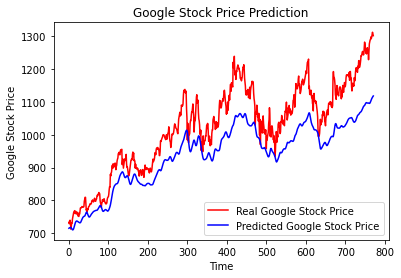

In [130]:
import matplotlib.pyplot as plt

plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()